# CLASSIFICATION OF PERSONAL INCOME

In this project, I have developed a classification model on the dataset of annual personal income of a group of USA-based individuals. By using logistic regression, I have made an attempt to classify the data set into the following two possible categories and checked the accuracy of the model:
1. Individuals earning more than 50,000 USD p.a.
2. Individuals earning less than or equal to 50,000 USD p.a.

### Importing libraries

I am using numpy and pandas to start with. For visualization, I am using the seaborn package and for implementing the machine learning model and processing of data, I am using the sklearn library.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

For data preprocessing, I am importing StandardScaler.

In [4]:
from sklearn.preprocessing import StandardScaler

To split the available dataset for testing and training, I am using the train_test_split method.

In [5]:
from sklearn.model_selection import train_test_split

Next, I am importing the machine learning algorithm and some performance metrics to evaluate my model.

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score

For plotting the receiver operating charecteristic (ROC) curve, I am using the matplotlib package.

In [8]:
import matplotlib.pyplot as plt

### Importing data

In [9]:
income_df=pd.read_csv("C:/Users/DEBDUTTA/Downloads/Python for Data Science/income.csv")

The dataset is now loaded into the variable dataset. Now, I will just take a glimpse of the data using the head() and info() methods before I actually start processing and visualizing it.

In [10]:
income_df.head(50)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
8,17,?,11th,Never-married,?,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"


In [11]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


I can see that the dataset contains 31978 rows with no missing values. There are a total of 12 attributes (out of which 4 are of integer type, the rest being object type) and one target variable 'SalStat' which I wish to classify.

### Data Wrangling

From above, it is clear that the dataset contains no missing values. But is that really the case?? To check, let me deep dive into the dataset!

In [12]:
print(np.unique(income_df['age']))
print(np.unique(income_df['JobType']))
print(np.unique(income_df['EdType']))
print(np.unique(income_df['maritalstatus']))
print(np.unique(income_df['occupation']))
print(np.unique(income_df['relationship']))
print(np.unique(income_df['race']))
print(np.unique(income_df['gender']))
print(np.unique(income_df['capitalgain']))
print(np.unique(income_df['capitalloss']))
print(np.unique(income_df['hoursperweek']))
print(np.unique(income_df['nativecountry']))
print(np.unique(income_df['SalStat']))

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']

Looks like there are some missing values which are in the form of question mark. So, I am converting these into default NaN values of Python.

In [13]:
income_df=pd.read_csv("C:/Users/DEBDUTTA/Downloads/Python for Data Science/income.csv",na_values=[" ?"])

Now, I am checking the total count of NaN values against each of the variables.

In [14]:
income_df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

The 'JobType' and 'occupation' variables contain 1809 and 1816 missing values, respectively. Let me check in which of the rows both or any of the variables are missing.

In [15]:
missing=income_df[income_df.isna().any(axis=1)]
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

Interpretation: There are 1816 rows in total where at least 1 value is missing. This means out of total 1816 missing 'occupation' values, 1809 of the rows contain both missing 'JobType' values and 'occupation' values, while the remaining 7 contains missing 'occupation' values only. 

### Dropping missing values

In [16]:
income_df.dropna(axis=0,inplace=True)

In [17]:
income_df.head(50)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,"less than or equal to 50,000"
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
10,45,Self-emp-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,"greater than 50,000"


### Exploratory data analysis

At first, I am obtaining the descriptive statistics of the numerical variables and then, considering the categorical variables for the same.

In [18]:
summary_num=income_df.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  30162.000000  30162.000000  30162.000000  30162.000000
mean      38.437902   1092.007858     88.372489     40.931238
std       13.134665   7406.346497    404.298370     11.979984
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       47.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [19]:
summary_cat=income_df.describe(include="O")
print(summary_cat)

         JobType    EdType        maritalstatus       occupation relationship  \
count      30162     30162                30162            30162        30162   
unique         7        16                    7               14            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286      9840                14065             4038        12463   

          race gender   nativecountry                        SalStat  
count    30162  30162           30162                          30162  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     25933  20380           27504                          22654  


Let's just have a glimpse of how the correlation is among the numerical variables.

In [20]:
income_df.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


Interpretation: All the values are closer to zero indicating that there exists little or no correlation between the above mentioned variables.

### Cross tables and data visualization

Let's check how the different attributes are affecting the target variable 'SalStat' by creating cross tables and graphs.

At first, let's check the proportion of gender and race of the overall income dataset.

In [21]:
pd.crosstab(index=income_df['gender'],columns='count',normalize=True)

col_0,count
gender,
Female,0.324315
Male,0.675685


Interpretation: 67.6% of the income data corresponds to male while the remaining 32.4% of the data corresponds to female. This indicates that male are high in proportion.

In [22]:
pd.crosstab(index=income_df['race'],columns='count',normalize=True)

col_0,count
race,
Amer-Indian-Eskimo,0.009482
Asian-Pac-Islander,0.029673
Black,0.093396
Other,0.007659
White,0.859790


Interpretation: Majority of the income data (86%) corresponds to white race followed by 9.3% corresponding to black and 3% corresponding to Asian-Pacific-Islander race. This indicates that white are highest in proportion followed by the black and Asian-Pacific-Islander.

Next, let's check how 'SalStat' is varying across 'JobType', 'EdType', and 'occupation' attributes. 

In [23]:
pd.crosstab(index=income_df['JobType'],columns=income_df['SalStat'],normalize='index',margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


Interpretation: Around 75% of the population earns less than or equal to 50,000 while the remaining 25% earns more than 50,000. Around 56% of the self-employed workers earn greater than 50,000. Around 78% of the private workers earn less than or equal to 50,000. The distribution is very uneven for each of the job types except for self-employed because 56% of them earn greater than 50,000 while 44% of this group earn less or equal to 50,000.
The JobType variable proves to be important to avoid the misuse of subsidies.

In [24]:
pd.crosstab(index=income_df['EdType'],columns=income_df['SalStat'],normalize='index',margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


Interpretation: A doctorate (75%), professional school graduate (75%) or a masters (56%) are the most likely ones to earn more than 50,000 p.a, while 1st-4th standard pass outs are the most less likely (only 4%) to earn the same. A preschool pass out has 0% chances of earning higher than 50,000. The EdType variable proves to be important to avoid the misuse of subsidies.

In [25]:
pd.crosstab(index=income_df['occupation'],columns=income_df['SalStat'],normalize='index',margins=True)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


Interpretation: A executive managerial (48.5%) or a professionally specialized person (44.8%) are the most likely ones to earn more than 50,000 p.a, while the private house servants (0.7%), handlers-cleaners (6.1%), and other service occupied (4.1%) are the most less likely to earn the same. The occupation variable proves to be important to avoid the misuse of subsidies.

Let's check how the target variable varies across the 'age' and 'hoursperweek' variables with the help of box plots.

<AxesSubplot:xlabel='SalStat', ylabel='age'>

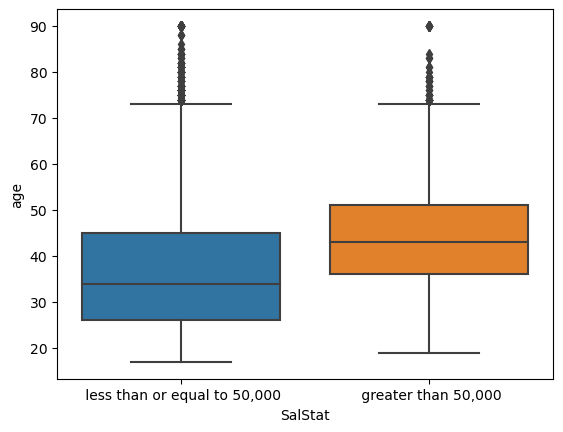

In [26]:
sns.boxplot(x=income_df['SalStat'],y=income_df['age'])

Interpretation: The above plot shows that individuals earning less than or equal to 50,000 roughly belong to the 25-45 age group while those earning greater than 50,000 roughly belong to the 35-50 age group. The median age for first category of individuals seems to be 34 from the graph. The same for the second category of individuals seems to be 43 from the graph.

<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

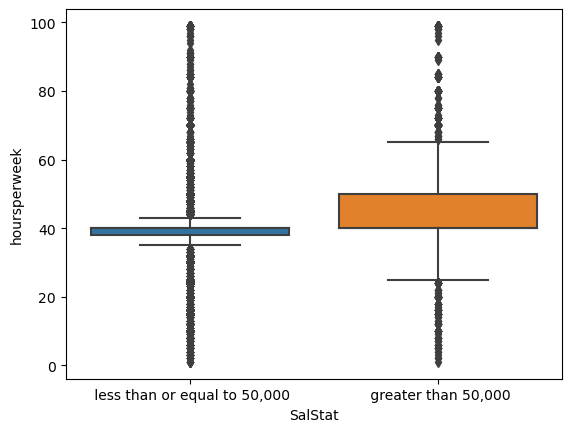

In [27]:
sns.boxplot(x=income_df['SalStat'],y=income_df['hoursperweek'])

Interpretation: It is very clear from the plot that those individuals who earn greater than 50,000 p.a are more likely to work for more than 40 hours per week while individuals earning less than or equal to 50,000 p.a are more likely to work for less than 40 hours per week.

Now, with the help of bar graphs, let's check SalStat's variability across 'maritalstatus' and 'relationship'.

<AxesSubplot:xlabel='count', ylabel='maritalstatus'>

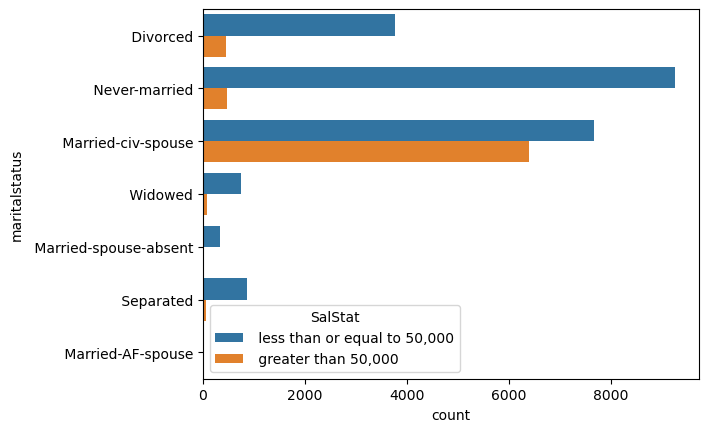

In [28]:
sns.countplot(y="maritalstatus",data=income_df,hue="SalStat")

Interpretation: The never-married category represent the majority followed by married with civillian spouse category among the individuals earning less than or equal to 50,000. Among the individuals earning greater than 50,000, only the married with civillian spouse category represents majority while the other categories are much less likely to earn the same.

<AxesSubplot:xlabel='count', ylabel='relationship'>

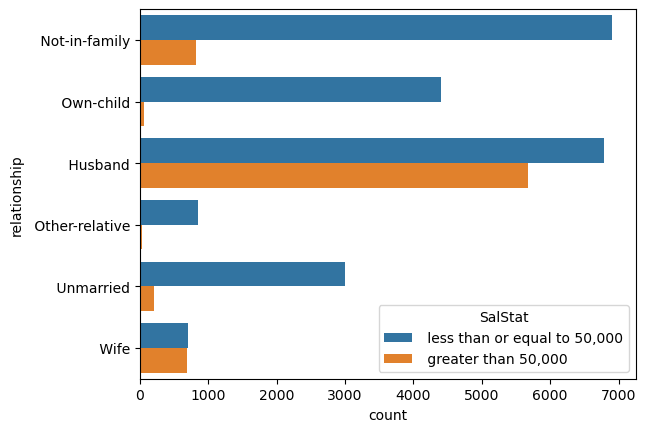

In [29]:
sns.countplot(y="relationship",data=income_df,hue="SalStat")

Let's plot the individual distribution of 'capitalgain' and 'capitalloss' variables. 

<AxesSubplot:xlabel='capitalgain', ylabel='Count'>

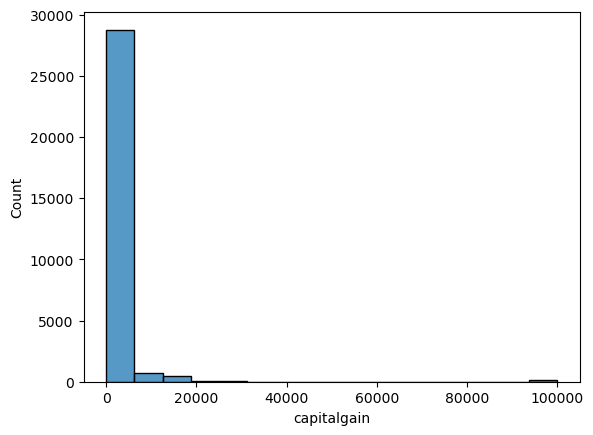

In [30]:
sns.histplot(x=income_df['capitalgain'])

<AxesSubplot:xlabel='capitalloss', ylabel='Count'>

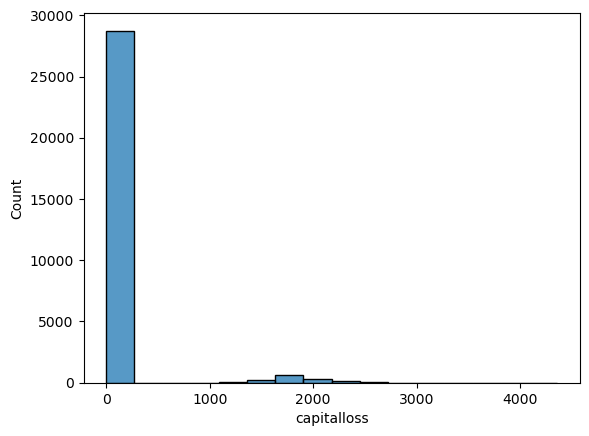

In [31]:
sns.histplot(x=income_df['capitalloss'])

Interpretation: We know that if capital gain of an individual is high, his/her income status is also high. In both the plots we see that capital gain and capital loss are zero for most of the individuals. These could be important variables for classifying the salary status.

### Logistic regression

First, I need to convert the categorical target variable 'SalStat' into a numeric one. For that, I am using the .replace operator here.

In [32]:
income_df['SalStat'].replace([' less than or equal to 50,000', ' greater than 50,000'],[0, 1], inplace=True)

A glimpse of the numerical target variable 'SalStat'.....

In [33]:
income_df['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

A glimpse of the first 10 observations of the dataset, considering the above change.

In [34]:
income_df.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,0
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,0
10,45,Self-emp-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,1


Now, one-hot encoding the data to turn 'SalStat' into a binary vector representation.

In [35]:
new_data=pd.get_dummies(income_df,drop_first=True)
print(new_data)

       age  capitalgain  capitalloss  hoursperweek  SalStat  \
0       45            0            0            28        0   
1       24            0            0            40        0   
2       44            0            0            40        1   
3       27            0            0            40        0   
4       20            0            0            35        0   
...    ...          ...          ...           ...      ...   
31973   34          594            0            60        0   
31974   34            0            0            40        0   
31975   23            0            0            40        0   
31976   42            0            0            40        0   
31977   29            0            0            40        0   

       JobType_ Local-gov  JobType_ Private  JobType_ Self-emp-inc  \
0                       0                 1                      0   
1                       0                 0                      0   
2                       0        

Note: The new_data dataframe contains only numerical values as the categorical variables have been converted into dummies.

This generates a lot of columns. Let's list them and print that list!

In [36]:
columns_list=list(new_data.columns)

In [37]:
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

Since the list contains all of the variables, we need to eliminate the target variable 'SalStat' from this list and consider only indepedent variables' list for further processing of data.

In [38]:
features=list(set(columns_list)-set(['SalStat']))
print(features)

['nativecountry_ England', 'nativecountry_ Yugoslavia', 'nativecountry_ Portugal', 'occupation_ Machine-op-inspct', 'gender_ Male', 'occupation_ Other-service', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'nativecountry_ Philippines', 'nativecountry_ Ireland', 'nativecountry_ Scotland', 'occupation_ Handlers-cleaners', 'EdType_ Bachelors', 'occupation_ Sales', 'nativecountry_ Nicaragua', 'occupation_ Priv-house-serv', 'occupation_ Armed-Forces', 'race_ Other', 'nativecountry_ Holand-Netherlands', 'EdType_ 9th', 'maritalstatus_ Married-spouse-absent', 'nativecountry_ China', 'nativecountry_ Germany', 'JobType_ Self-emp-inc', 'nativecountry_ Canada', 'EdType_ 1st-4th', 'maritalstatus_ Separated', 'nativecountry_ Laos', 'EdType_ Assoc-voc', 'EdType_ HS-grad', 'JobType_ Local-gov', 'relationship_ Not-in-family', 'race_ White', 'nativecountry_ Dominican-Republic', 'EdType_ Some-college', 'capitalgain', 'nativecountry_ Puerto-Rico',

'features' is the list of all the variables present in the income dataset except 'SalStat'

Next, let us consider two variables 'x' and 'y' to store the input values and output values into them. We extract the input values from the 'features' list and store them into 'x'. We extract the output values from the 'SalStat' variable and store them into 'y'.

In [39]:
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


Let's train the StandardScaler object to standardize each feature simultaneously.

In [41]:
SCALE=StandardScaler()

Now, I am fitting the SCALE object and transforming the set of input values into a new scaled variable 'x_scale'.

In [42]:
SCALE.fit(x)

StandardScaler()

In [43]:
x_scale=SCALE.transform(x)

I split the dataset into train set and test set, reserving 30% of the data set for testing the model.

In [44]:
train_x,test_x,train_y,test_y = train_test_split(x_scale,y,test_size=0.3, random_state=0)

Let's fit the model.

In [45]:
lr = LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression()

Now, fetching the intecept and coefficients of the fitted model.

In [46]:
lr.intercept_

array([-1.99503624])

In [47]:
lr.coef_

array([[-0.05056977, -0.02212588, -0.05347363, -0.07146106,  0.43521013,
        -0.2768988 , -0.16049414,  0.00612964,  0.26650082, -0.08957579,
        -0.03654186, -0.04597832, -0.14786559,  0.72562053,  0.07125947,
        -0.06251789, -0.27668409, -0.01583323,  0.01069621, -0.03464001,
        -0.01371624,  0.02728055, -0.12080937, -0.04598266, -0.05237586,
        -0.05731495, -0.01117595, -0.02772692, -0.04601354,  0.27209429,
         0.3704355 , -0.18597513,  0.16454386,  0.17608488, -0.12550625,
         0.46338254,  2.39662251, -0.1095234 , -0.35578216, -0.02767263,
        -0.03765255,  0.08530445, -0.0630284 ,  0.06619509,  0.04386002,
        -0.21358487, -0.27331659,  0.52871784,  0.33597036,  0.07105472,
        -0.06809354,  0.27307037, -0.05333481,  0.10423847, -0.11789721,
        -0.49245253,  1.02858258, -0.14565309, -0.18072682, -0.04920056,
        -0.03010459, -0.23829984, -0.06063573, -0.05809042, -0.12791906,
         0.35136186,  0.36559173, -0.02772183, -0.1

Let's predict the fitted model onto the test data set and evaluate its performance.

In [48]:
prediction = lr.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [49]:
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6318  505]
 [ 916 1310]]


We see that 7628 (that is 6318+1310) values are correctly classified but 1421 (that is 505+916) values are misclassified. Lets now check the accuracy score of the model.

In [50]:
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8429660735992928


So, 84.3% of the time our classification model is able to classify the income dataset correctly.

Let's now define the metrics for plotting ROC curve and calcuating area under curve (auc) for the model.

In [51]:
y_pred_proba = lr.predict_proba(test_x)[::,1]
fpr, tpr, _ = roc_curve(test_y,  y_pred_proba)
auc = roc_auc_score(test_y, y_pred_proba)

Time for plotting!

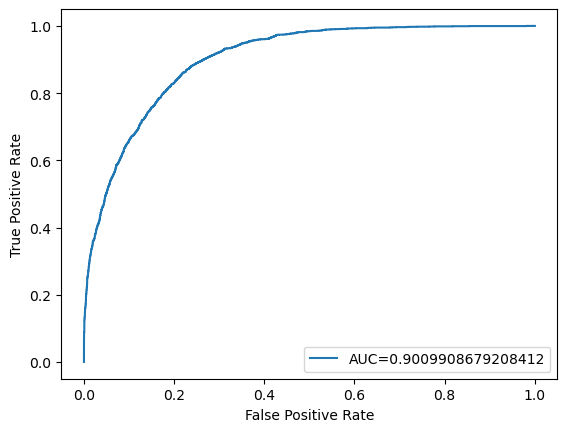

In [52]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the graph, we see that 90% of the plot is located under the curve. We can infer that the model does a pretty good job of classifying the income dataset.

### What if we remove some of the insignificant variables from the dataset and fit the model?

For that, let's form a column consisting of the insignificant variables and create a new dataset by dropping that column.

In [53]:
cols = ['gender','nativecountry','race','JobType']
new_data1 = income_df.drop(cols,axis = 1)

A glimpse of the first 10 observations of the dataset, considering the above change.

In [54]:
new_data1.head(10)

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0
5,44,HS-grad,Widowed,Exec-managerial,Unmarried,0,0,40,0
6,51,HS-grad,Married-civ-spouse,Craft-repair,Husband,0,0,40,0
7,20,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,0
9,19,HS-grad,Never-married,Machine-op-inspct,Own-child,0,0,40,0
10,45,Some-college,Married-civ-spouse,Craft-repair,Husband,0,0,55,1


Now, one-hot encoding the data to turn 'SalStat' into a binary vector representation.

In [55]:
new_data2=pd.get_dummies(new_data1,drop_first=True)
print(new_data2)

       age  capitalgain  capitalloss  hoursperweek  SalStat  EdType_ 11th  \
0       45            0            0            28        0             0   
1       24            0            0            40        0             0   
2       44            0            0            40        1             0   
3       27            0            0            40        0             0   
4       20            0            0            35        0             0   
...    ...          ...          ...           ...      ...           ...   
31973   34          594            0            60        0             0   
31974   34            0            0            40        0             0   
31975   23            0            0            40        0             0   
31976   42            0            0            40        0             0   
31977   29            0            0            40        0             0   

       EdType_ 12th  EdType_ 1st-4th  EdType_ 5th-6th  EdType_ 7th-8th  ...

Fetching the list of columns. And then, eliminating the target variable from that list.

In [56]:
columns_list2=list(new_data2.columns)
print(columns_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [57]:
features2=list(set(columns_list2)-set(['SalStat']))
print(features2)

['EdType_ Preschool', 'maritalstatus_ Married-civ-spouse', 'occupation_ Farming-fishing', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Exec-managerial', 'occupation_ Craft-repair', 'occupation_ Handlers-cleaners', 'EdType_ Bachelors', 'occupation_ Sales', 'EdType_ Doctorate', 'occupation_ Priv-house-serv', 'EdType_ Prof-school', 'occupation_ Armed-Forces', 'EdType_ 9th', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Widowed', 'relationship_ Own-child', 'hoursperweek', 'occupation_ Prof-specialty', 'EdType_ 1st-4th', 'maritalstatus_ Separated', 'EdType_ 5th-6th', 'EdType_ Assoc-voc', 'EdType_ HS-grad', 'EdType_ Some-college', 'relationship_ Not-in-family', 'capitalgain', 'EdType_ Assoc-acdm', 'capitalloss', 'maritalstatus_ Never-married', 'occupation_ Transport-moving', 'maritalstatus_ Married-AF-spouse', 'EdType_ 12th', 'EdType_ 11th', 'relationship_ Other-relative', 'age', 'EdType_ Masters', 'occupation_ Protective-serv', 'EdType_ 7th-8th', 'rel

Now, I am considering two variables 'x1' and 'y1' to store the input values and output values into them, just as I did previously.

In [58]:
x1 = new_data2[features2].values
print(x1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [59]:
y1=new_data2['SalStat'].values
print(y1)

[0 0 1 ... 0 0 0]


For scaling purpose, I am fitting the SCALE object and transforming the set of input values into a new scaled variable 'x1_scale'.

In [60]:
SCALE.fit(x1)

StandardScaler()

In [61]:
x1_scale=SCALE.transform(x1)

Next we split the dataset as before and fit the model.

In [62]:
train_x1,test_x1,train_y1,test_y1 = train_test_split(x1_scale,y1,test_size=0.3, random_state=0)

In [63]:
lr1 = LogisticRegression()
lr1.fit(train_x1,train_y1)

LogisticRegression()

Let's predict the fitted model onto the test data set and evaluate its performance.

In [64]:
prediction1 = lr1.predict(test_x1)
print(prediction1)

[0 0 0 ... 0 0 0]


In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [66]:
confusion_matrix1 = confusion_matrix(test_y1, prediction1)
print(confusion_matrix1)

[[6316  507]
 [ 926 1300]]


We see that 7616 (that is 6316+1300) values are correctly classified but 1433 (that is 507+926) values are misclassified. Lets now check the accuracy score of the model.

In [67]:
accuracy_score1=accuracy_score(test_y1, prediction1)
print(accuracy_score1)

0.8416399602165985


So, 84.2% of the time our classification model is able to classify the income dataset correctly.

Defining the metrics for plotting ROC curve and calcuating auc for this model.

In [68]:
y1_pred_proba = lr1.predict_proba(test_x1)[::,1]
fpr, tpr, _ = roc_curve(test_y1,  y1_pred_proba)
auc1 = roc_auc_score(test_y1, y1_pred_proba)

Plotting time!

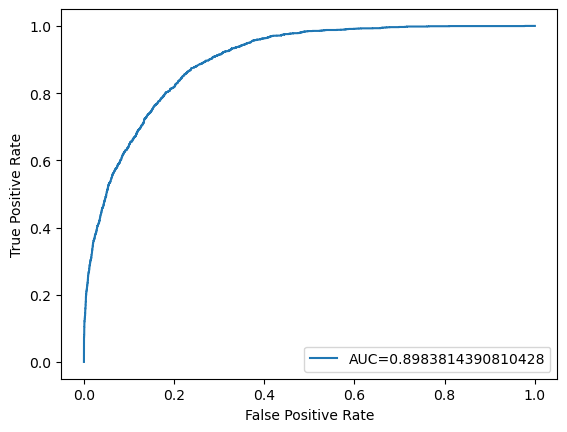

In [69]:
plt.plot(fpr,tpr,label="AUC="+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the graph, we see that 89.8% of the plot is located under the curve. We can infer that the model does a good job of classifying the income dataset.

#### If we compare the performance metrics of the two models, we get:

#### Accuracy score of 84.3% vs. 84.2% and AUC score of 90% vs. 89.8%.

#### Clearly, the first model, where all the variables were taken into consideration, performed better than the second one in classifying the dataset. So, removing insignificant variables before fitting the classification model will not be yielding the best results in this case.